In [3]:
#Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV

In [4]:
#Importing dataset
## We are reading the database and assigned as "df"

df = pd.read_csv('hospital_readmissions.csv')
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


In [5]:
# We can see that this dataset has categorical and numerical variables, and also we can see that this dataset has no null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  object
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted         25000 non-null  objec

In [6]:
df.describe()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency
count,25000.00000,25000.00000,25000.000000,25000.000000,25000.000000,25000.000000,25000.000000
mean,4.45332,43.24076,1.352360,16.252400,0.366400,0.615960,0.186600
std,3.00147,19.81862,1.715179,8.060532,1.195478,1.177951,0.885873
min,1.00000,1.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,2.00000,31.00000,0.000000,11.000000,0.000000,0.000000,0.000000
50%,4.00000,44.00000,1.000000,15.000000,0.000000,0.000000,0.000000
75%,6.00000,57.00000,2.000000,20.000000,0.000000,1.000000,0.000000
max,14.00000,113.00000,6.000000,79.000000,33.000000,15.000000,64.000000


In [7]:
df.dtypes

,0
age,object
time_in_hospital,int64
n_lab_procedures,int64
n_procedures,int64
n_medications,int64
n_outpatient,int64
n_inpatient,int64
n_emergency,int64
medical_specialty,object
diag_1,object


In [8]:
(df.isnull().sum())

,0
age,0
time_in_hospital,0
n_lab_procedures,0
n_procedures,0
n_medications,0
n_outpatient,0
n_inpatient,0
n_emergency,0
medical_specialty,0
diag_1,0


**Data Analysis**



In [9]:
# Importing LabelEncoder

from sklearn.preprocessing import LabelEncoder

label_encoder_age = LabelEncoder()
label_encoder_medical_specialty = LabelEncoder()
label_encoder_diag_1 = LabelEncoder()
label_encoder_diag_2 = LabelEncoder()
label_encoder_diag_3 = LabelEncoder()
label_encoder_glucose_test = LabelEncoder()
label_encoder_A1Ctest = LabelEncoder()
label_encoder_diabetes_med = LabelEncoder()
label_encoder_readmitted = LabelEncoder()
label_encoder_change = LabelEncoder()

df['age'] = label_encoder_age.fit_transform(df['age'])
df['medical_specialty'] = label_encoder_medical_specialty.fit_transform(df['medical_specialty'])
df['diag_1'] = label_encoder_diag_1.fit_transform(df['diag_1'])
df['diag_2'] = label_encoder_diag_2.fit_transform(df['diag_2'])
df['diag_3'] = label_encoder_diag_3.fit_transform(df['diag_3'])
df['glucose_test'] = label_encoder_glucose_test.fit_transform(df['glucose_test'])
df['A1Ctest'] = label_encoder_A1Ctest.fit_transform(df['A1Ctest'])
df['diabetes_med'] = label_encoder_diabetes_med.fit_transform(df['diabetes_med'])
df['readmitted'] = label_encoder_readmitted.fit_transform(df['readmitted'])
df['change'] = label_encoder_change.fit_transform(df['change'])

<Axes: >

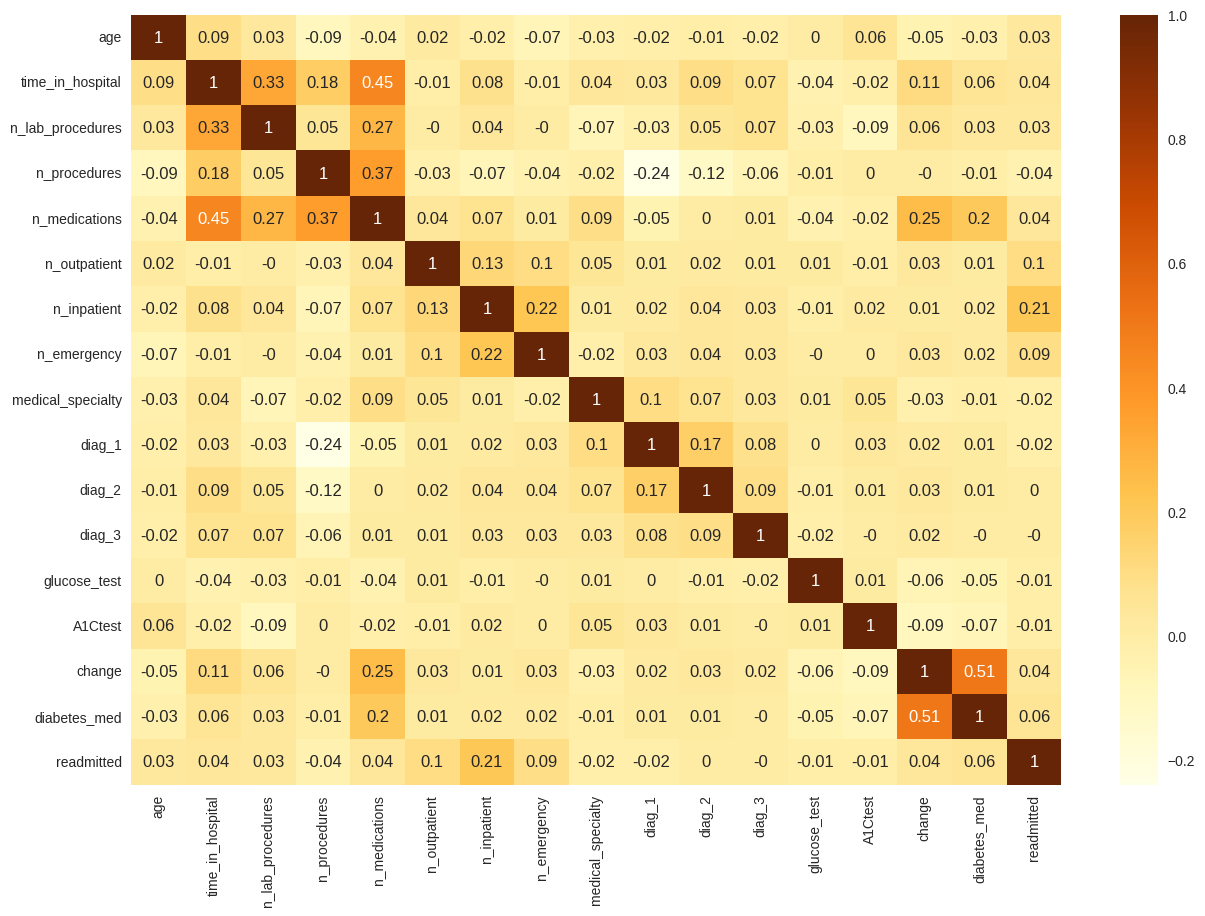

In [10]:
# Verifying the correlation between features
## Apparently, we don't have strong correlation between the features

corr = df.corr().round(2)
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot = True, cmap = 'YlOrBr')

**Categorical Features**

From these categorical features, from the feature n_procedures, we can say that the higher number, the smaller the amount of data. Looking at the feature medical_specialty we can see that we have a lot of missing data. Also, when we look at the diagnosis feature, we can see that we have different diagnoses in the 3 values.

<ipython-input-11-82ca086123d3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'n_procedures', palette = 'Set2', data = df)
<ipython-input-11-82ca086123d3>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'medical_specialty', palette = 'Set2', data = df)
<ipython-input-11-82ca086123d3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'diag_1', palette = 'Set2', data = df)
<ipython-input-11-82ca086123d3>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

<Axes: xlabel='diag_3', ylabel='count'>

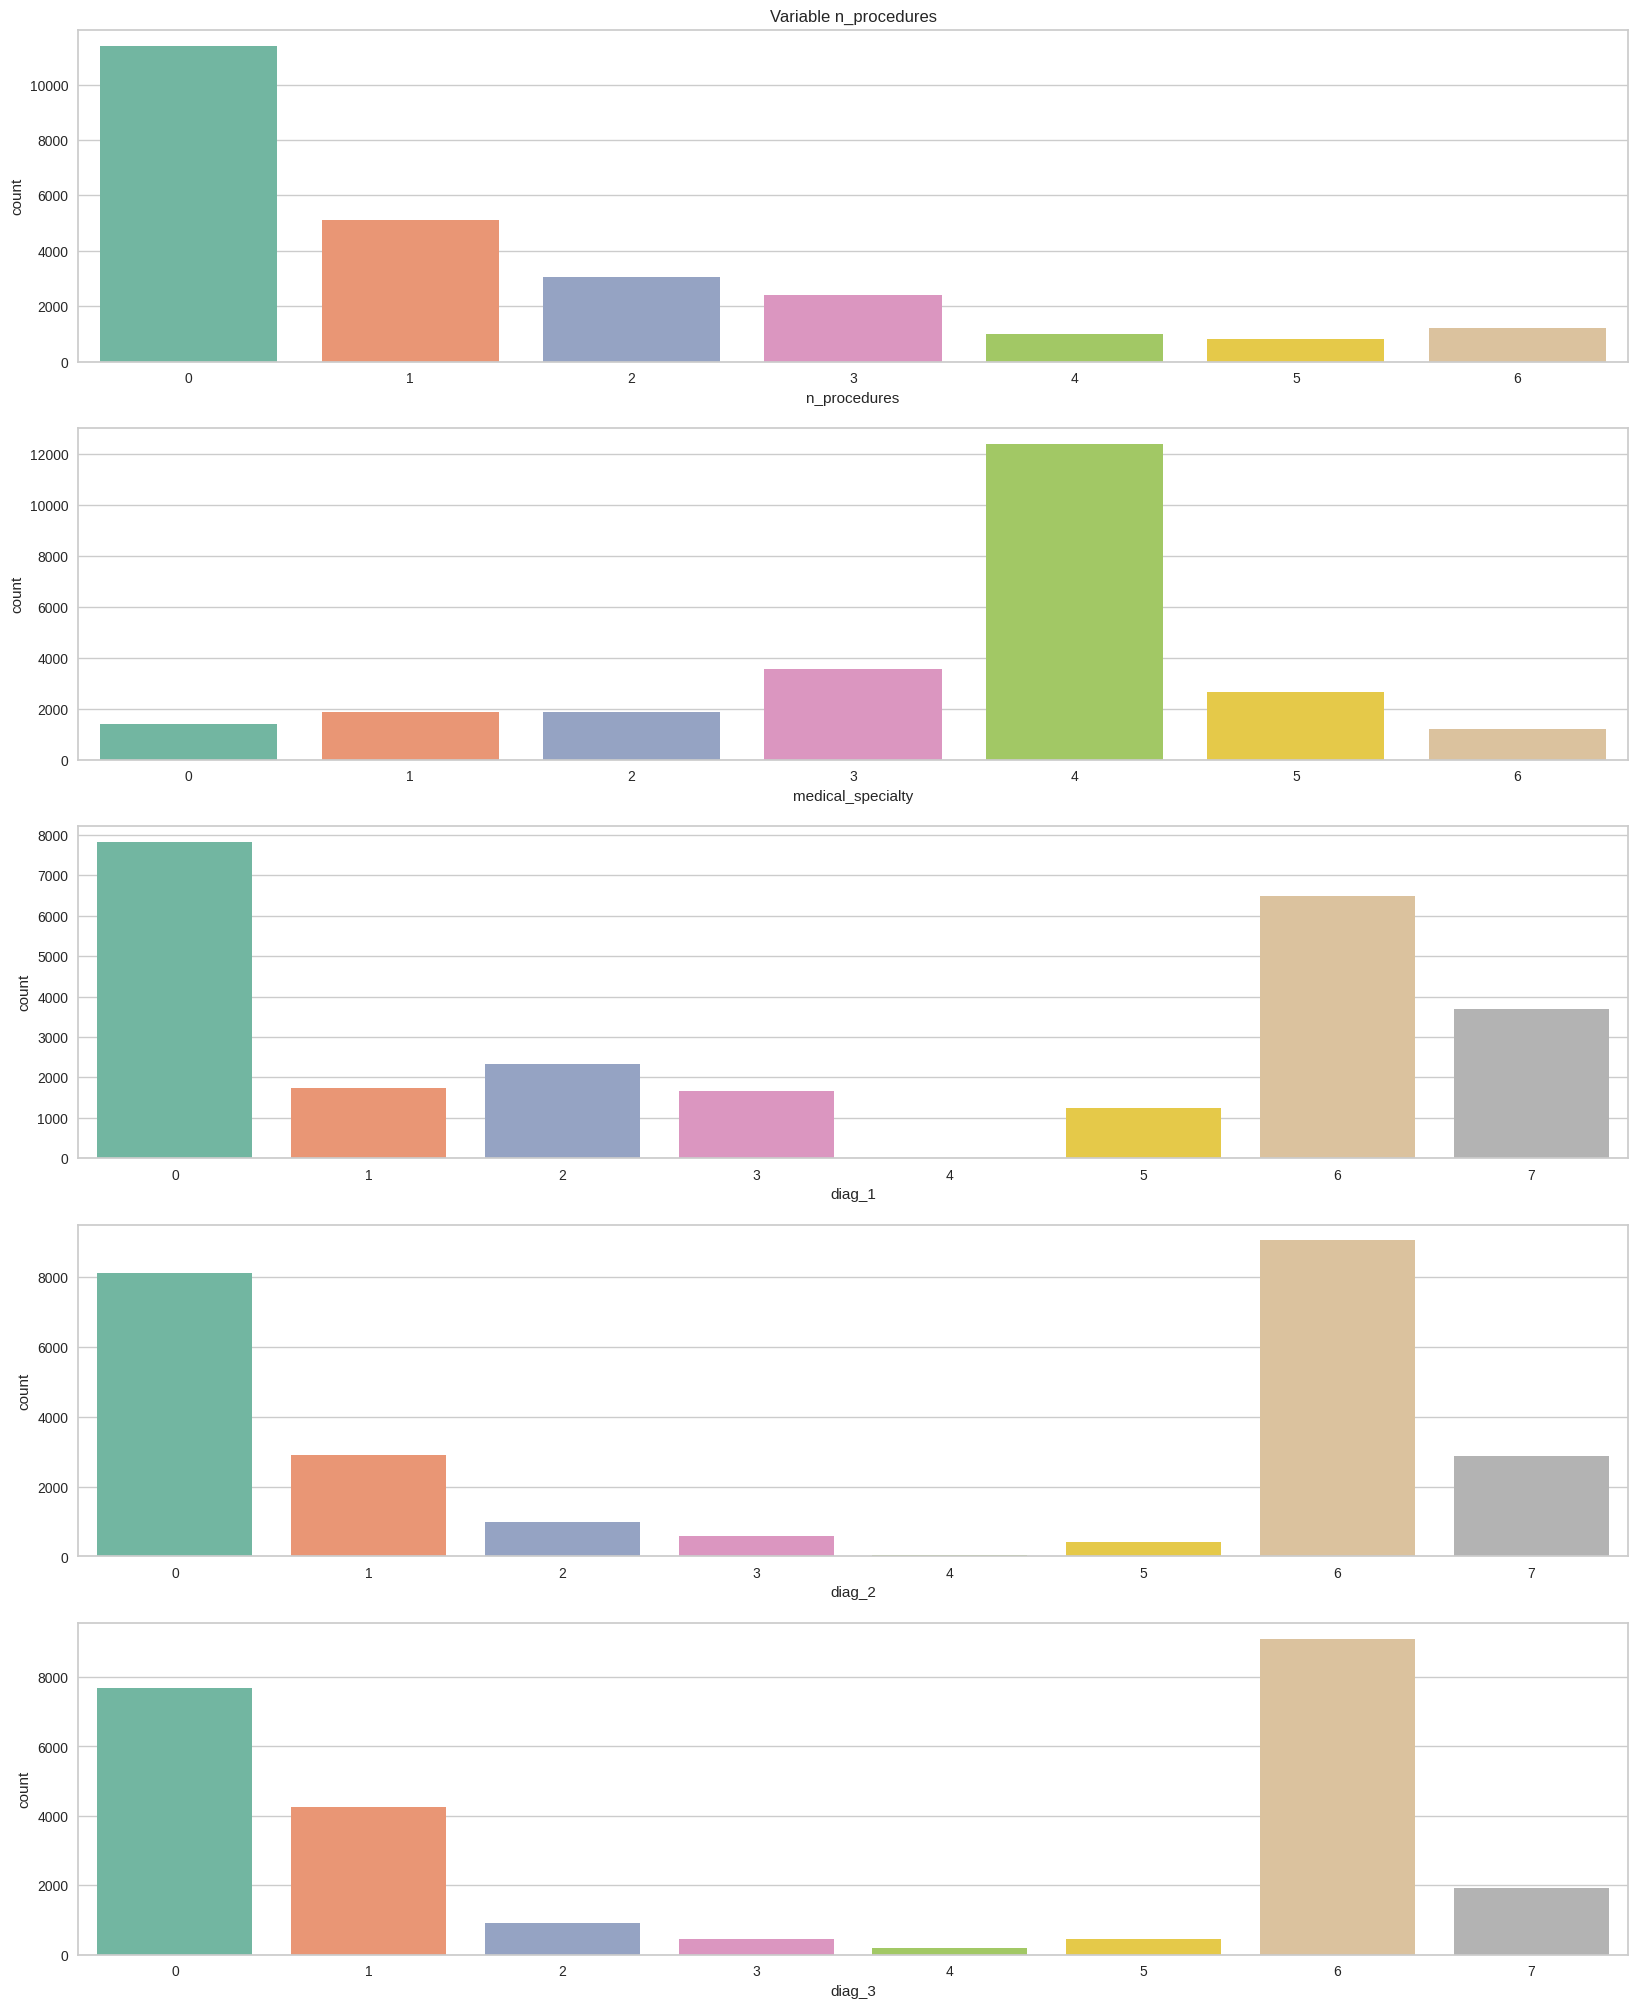

In [11]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 1, 1)
plt.gca().set_title('Variable n_procedures')
sns.countplot(x = 'n_procedures', palette = 'Set2', data = df)

plt.subplot(5, 1, 2)
sns.countplot(x = 'medical_specialty', palette = 'Set2', data = df)

plt.subplot(5, 1, 3)
sns.countplot(x = 'diag_1', palette = 'Set2', data = df)

plt.subplot(5, 1, 4)
sns.countplot(x = 'diag_2', palette = 'Set2', data = df)

plt.subplot(5, 1, 5)
sns.countplot(x = 'diag_3', palette = 'Set2', data = df)



Below, by looking at the age feature, we can say that most of the patients are older, looking at the glucose, we can say that most of the data do not have glucose test, the same thing for the A1C test variable. Looking at our target feature we can see that the base is well distributed between the two data.

<ipython-input-12-bf13800ff845>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'age', palette = 'Set2', data = df)
<ipython-input-12-bf13800ff845>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'glucose_test', palette = 'Set2', data = df)
<ipython-input-12-bf13800ff845>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'A1Ctest', palette = 'Set2', data = df)
<ipython-input-12-bf13800ff845>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable

<Axes: title={'center': 'Variable readmitted'}, xlabel='readmitted', ylabel='count'>

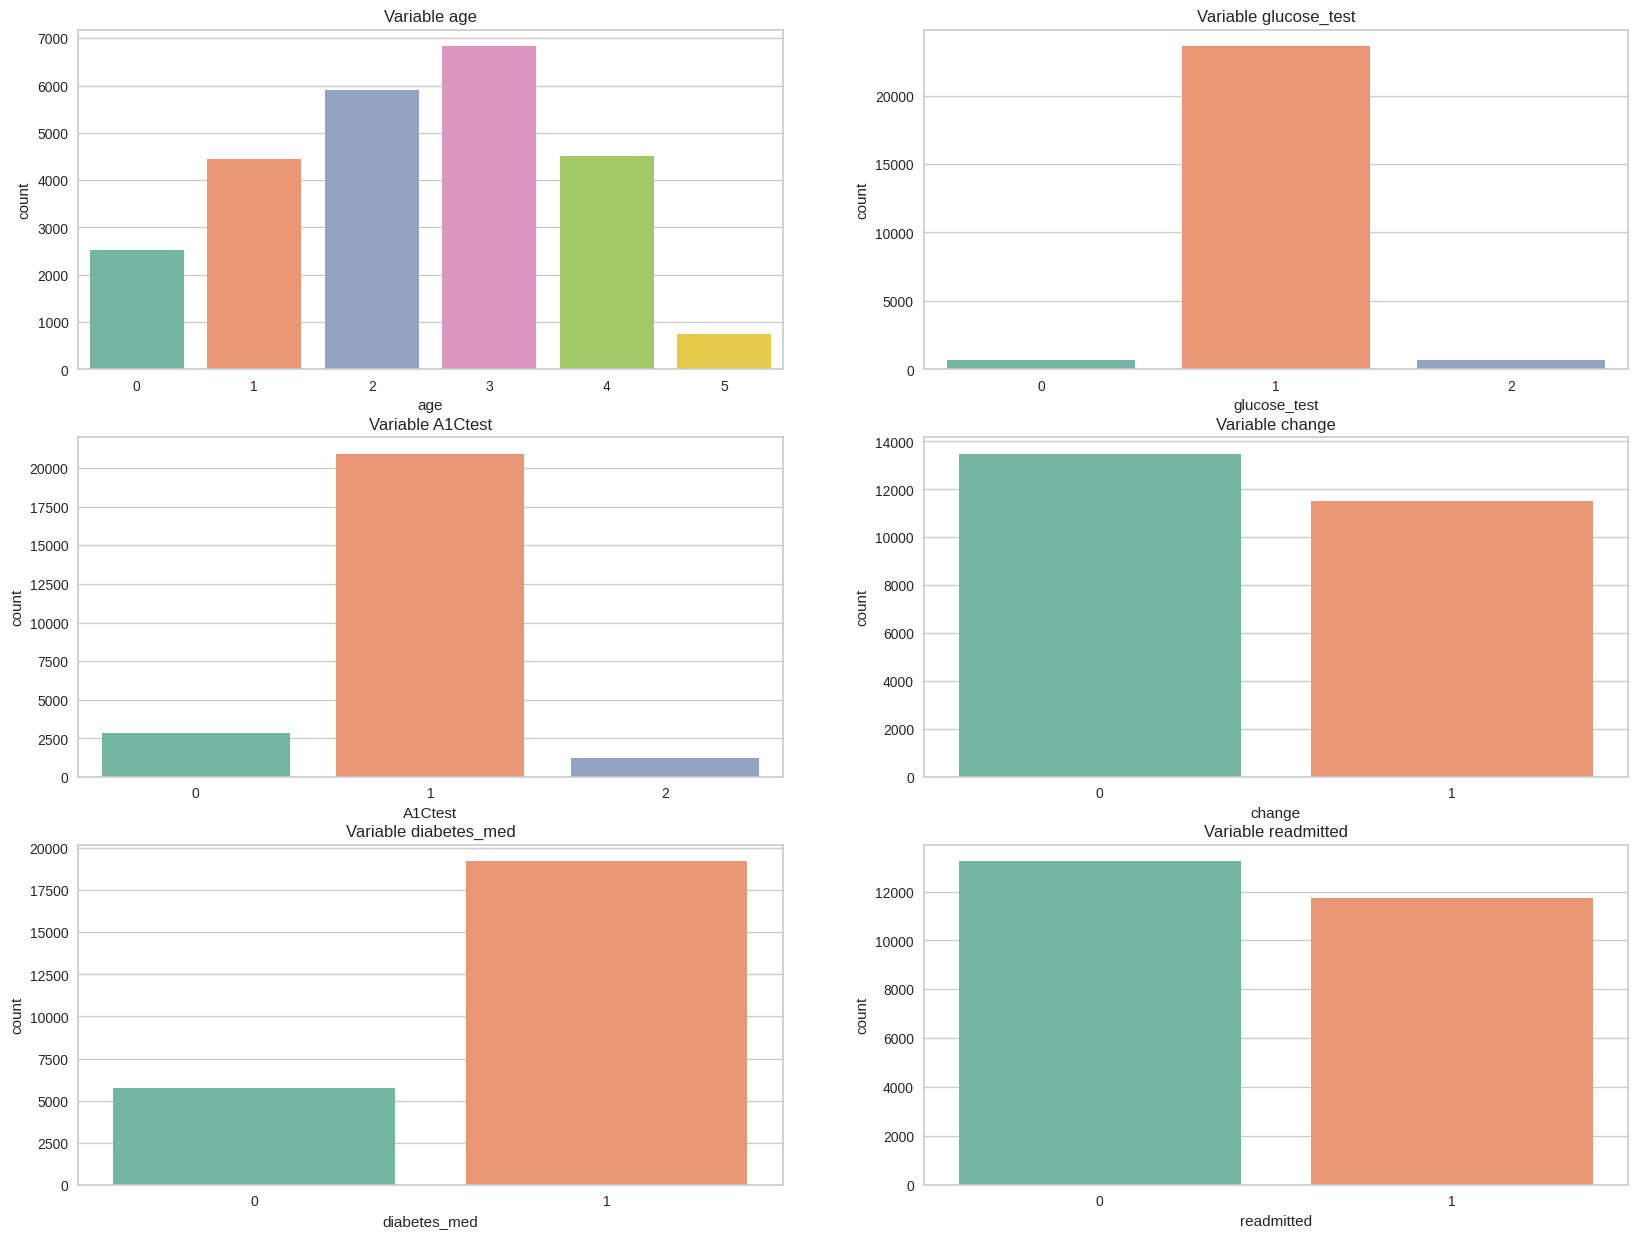

In [12]:
plt.figure(figsize = (20, 15))

plt.subplot(3, 2, 1)
plt.gca().set_title('Variable age')
sns.countplot(x = 'age', palette = 'Set2', data = df)

plt.subplot(3, 2, 2)
plt.gca().set_title('Variable glucose_test')
sns.countplot(x = 'glucose_test', palette = 'Set2', data = df)

plt.subplot(3, 2, 3)
plt.gca().set_title('Variable A1Ctest')
sns.countplot(x = 'A1Ctest', palette = 'Set2', data = df)

plt.subplot(3, 2, 4)
plt.gca().set_title('Variable change')
sns.countplot(x = 'change', palette = 'Set2', data = df)

plt.subplot(3, 2, 5)
plt.gca().set_title('Variable diabetes_med')
sns.countplot(x = 'diabetes_med', palette = 'Set2', data = df)

plt.subplot(3, 2, 6)
plt.gca().set_title('Variable readmitted')
sns.countplot(x = 'readmitted', palette = 'Set2', data = df)

**Continuous Features**

Looking at the continuous Features, we can see that the larger the value, the smaller the amount of data available.

<Axes: xlabel='n_emergency', ylabel='Count'>

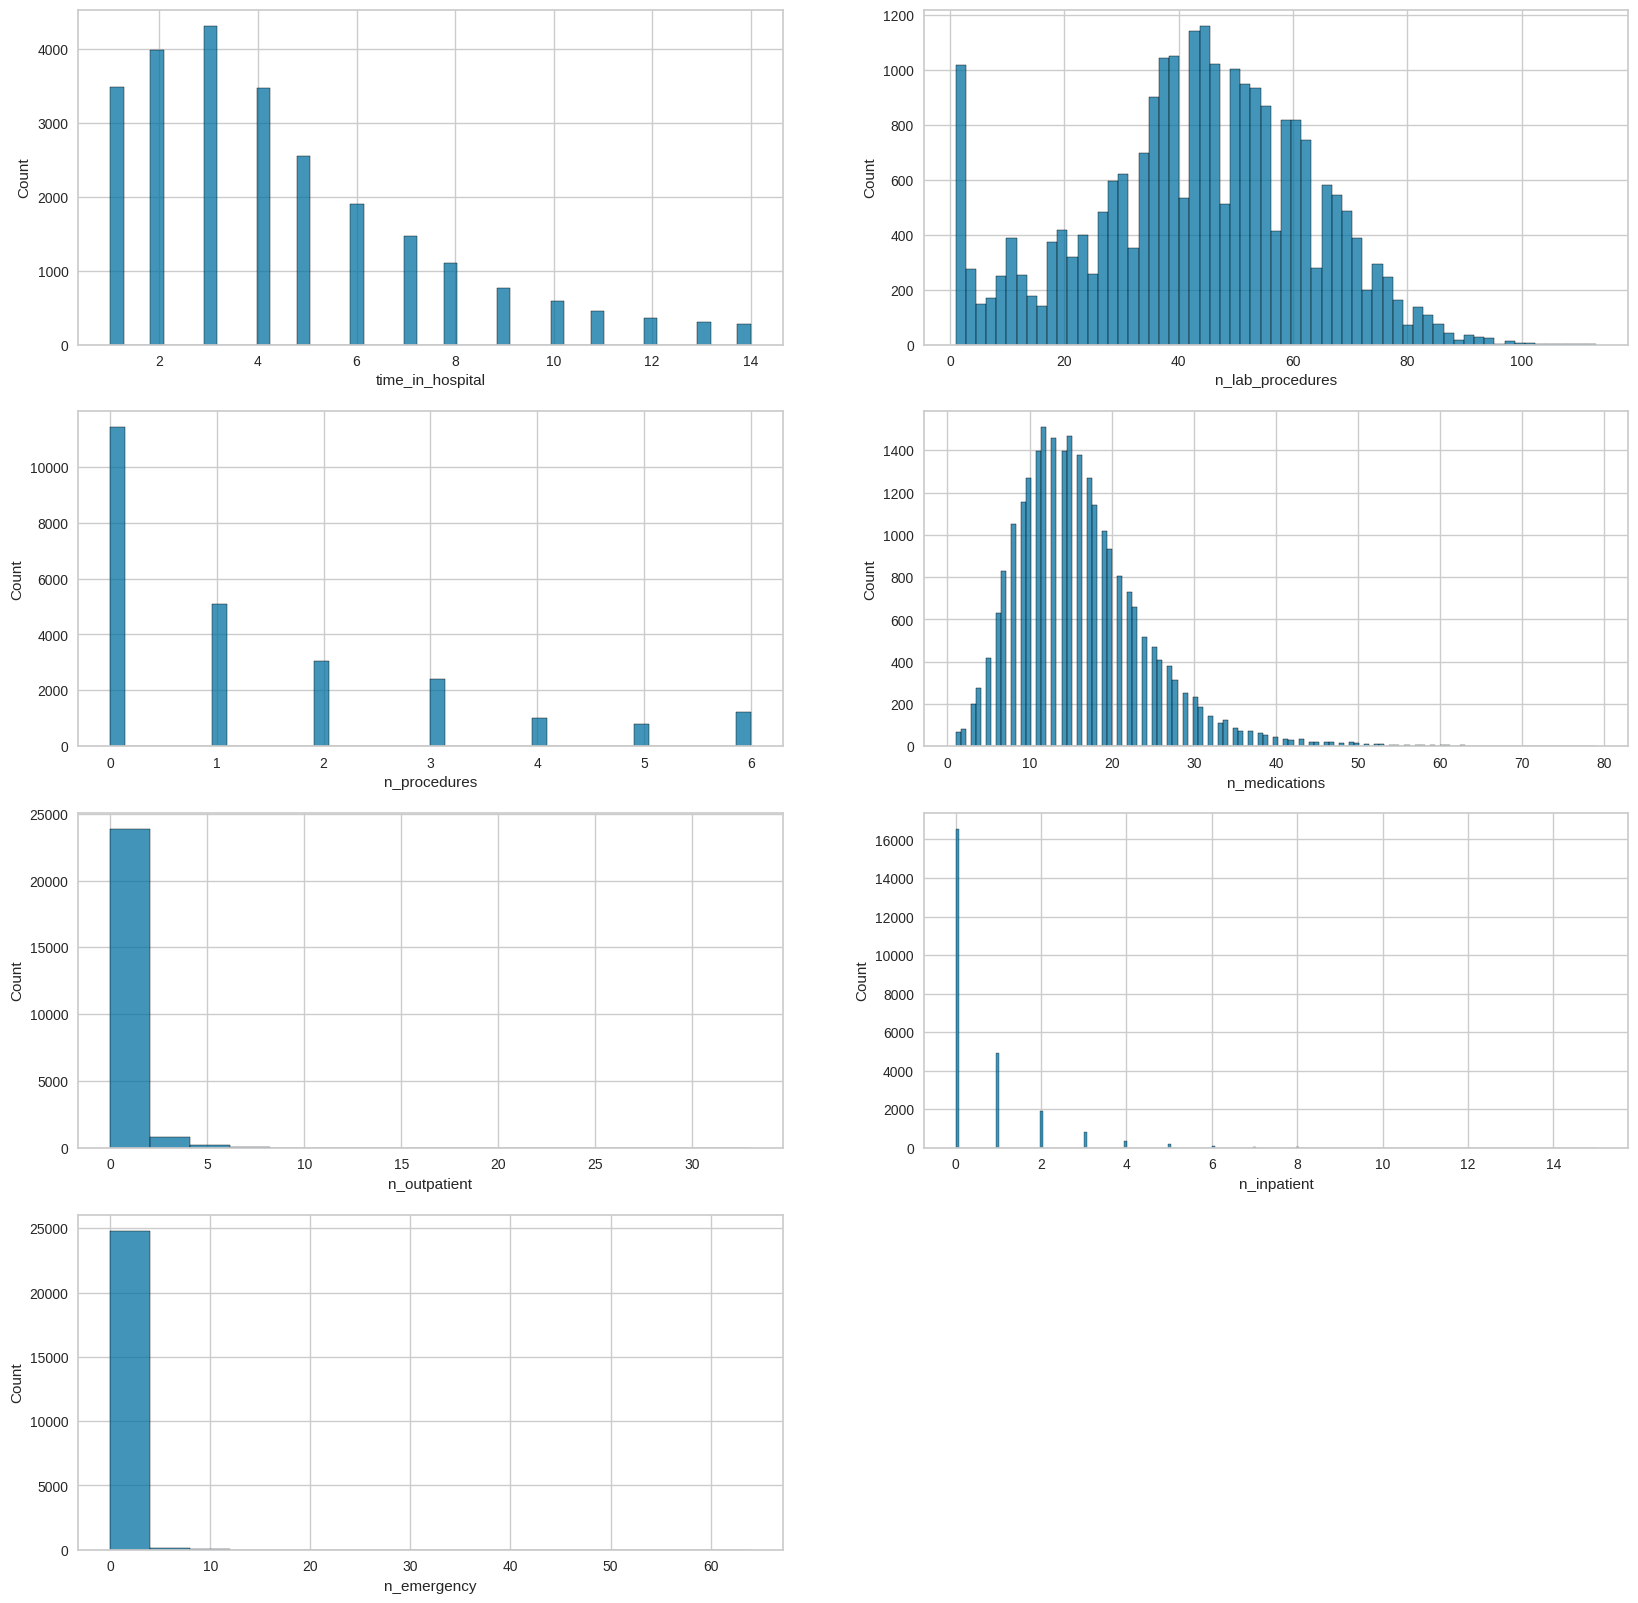

In [13]:
plt.figure(figsize = (20, 20))

plt.subplot(4, 2, 1)
sns.histplot(x = df['time_in_hospital'], kde = False)

plt.subplot(4, 2, 2)
sns.histplot(x = df['n_lab_procedures'], kde = False)

plt.subplot(4, 2, 3)
sns.histplot(x = df['n_procedures'], kde = False)

plt.subplot(4, 2, 4)
sns.histplot(x = df['n_medications'], kde = False)

plt.subplot(4, 2, 5)
sns.histplot(x = df['n_outpatient'], kde = False)

plt.subplot(4, 2, 6)
sns.histplot(x = df['n_inpatient'], kde = False)

plt.subplot(4, 2, 7)
sns.histplot(x = df['n_emergency'], kde = False)

By visualizing through boxplot, we can see that we have some outliers, but we can just neglect them for now.

<Axes: title={'center': 'Boxplot time_in_hospital'}, xlabel='time_in_hospital'>

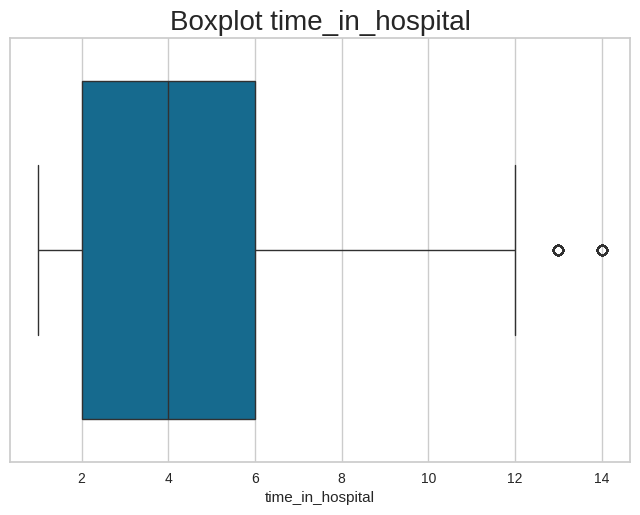

In [14]:
plt.title("Boxplot time_in_hospital", fontdict = {'fontsize': 20})
sns.boxplot(x=df["time_in_hospital"])


<Axes: title={'center': 'Boxplot n_lab_procedures'}, xlabel='n_lab_procedures'>

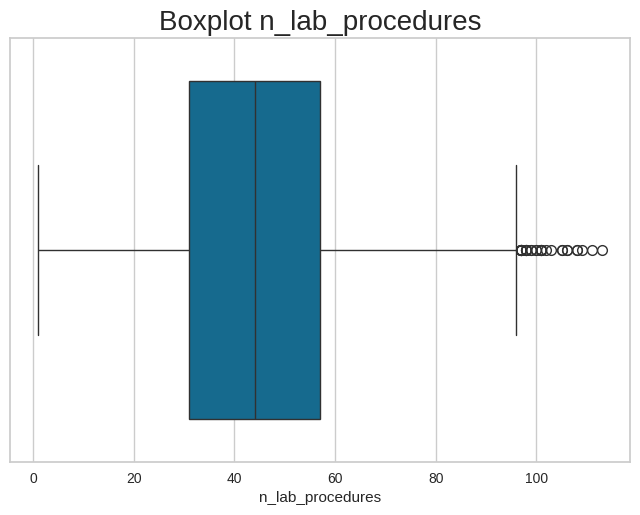

In [15]:
plt.title("Boxplot n_lab_procedures", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_lab_procedures"])

<Axes: title={'center': 'Boxplot n_procedures'}, xlabel='n_procedures'>

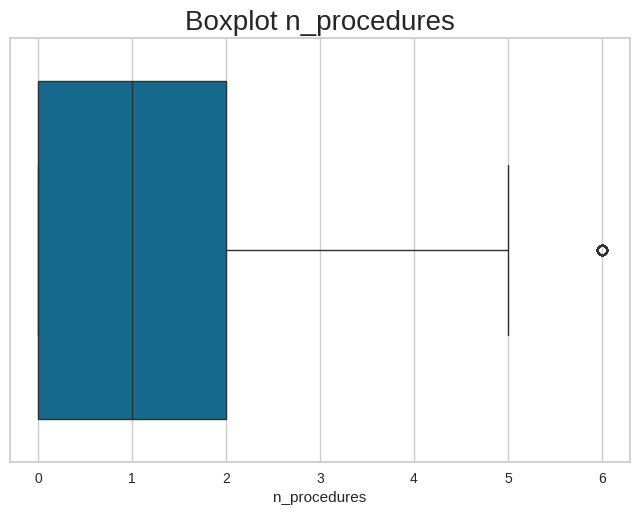

In [16]:
plt.title("Boxplot n_procedures", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_procedures"])

<Axes: title={'center': 'Boxplot n_medications'}, xlabel='n_medications'>

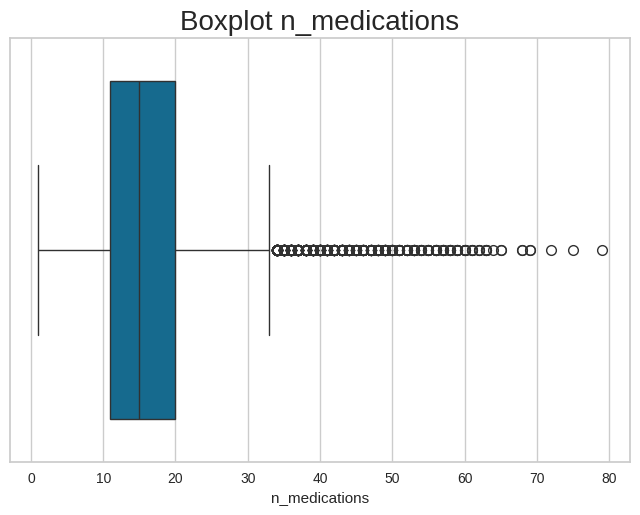

In [17]:
plt.title("Boxplot n_medications", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_medications"])

<Axes: title={'center': 'Boxplot n_medications'}, xlabel='n_medications'>

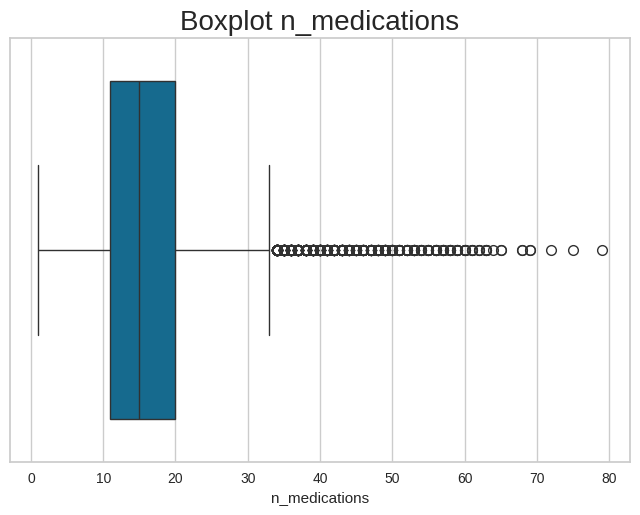

In [18]:
plt.title("Boxplot n_medications", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_medications"])

<Axes: title={'center': 'Boxplot n_outpatient'}, xlabel='n_outpatient'>

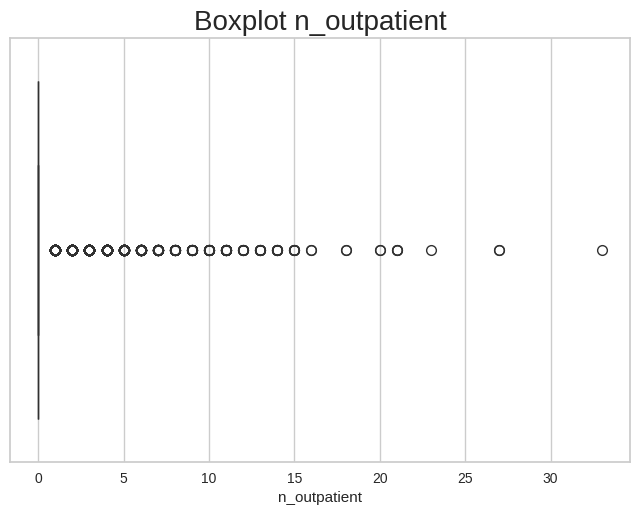

In [19]:
plt.title("Boxplot n_outpatient", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_outpatient"])

<Axes: title={'center': 'Boxplot n_inpatient'}, xlabel='n_inpatient'>

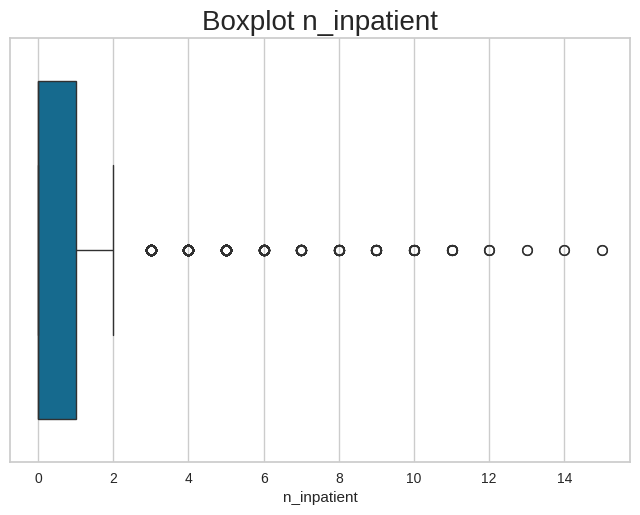

In [20]:
plt.title("Boxplot n_inpatient", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_inpatient"])

<Axes: title={'center': 'Boxplot n_emergency'}, xlabel='n_emergency'>

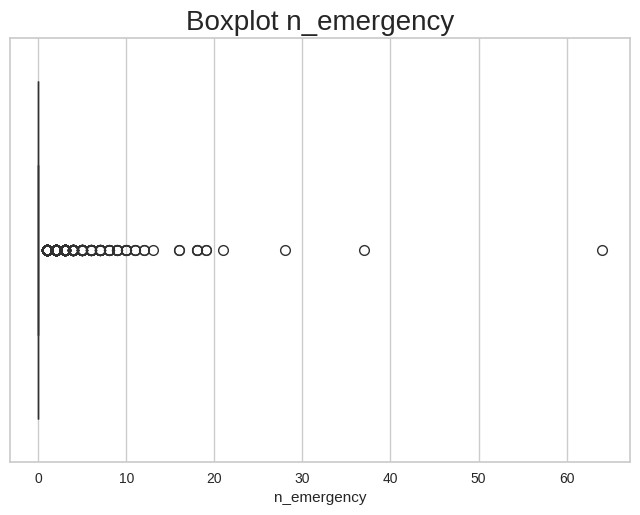

In [21]:
plt.title("Boxplot n_emergency", fontdict = {'fontsize': 20})
sns.boxplot(x=df["n_emergency"])

**Bivariate Analysis**

When we compare our categorical features, we can see that we don't have any distortion among them compared to the target feature

<Axes: xlabel='diag_3', ylabel='count'>

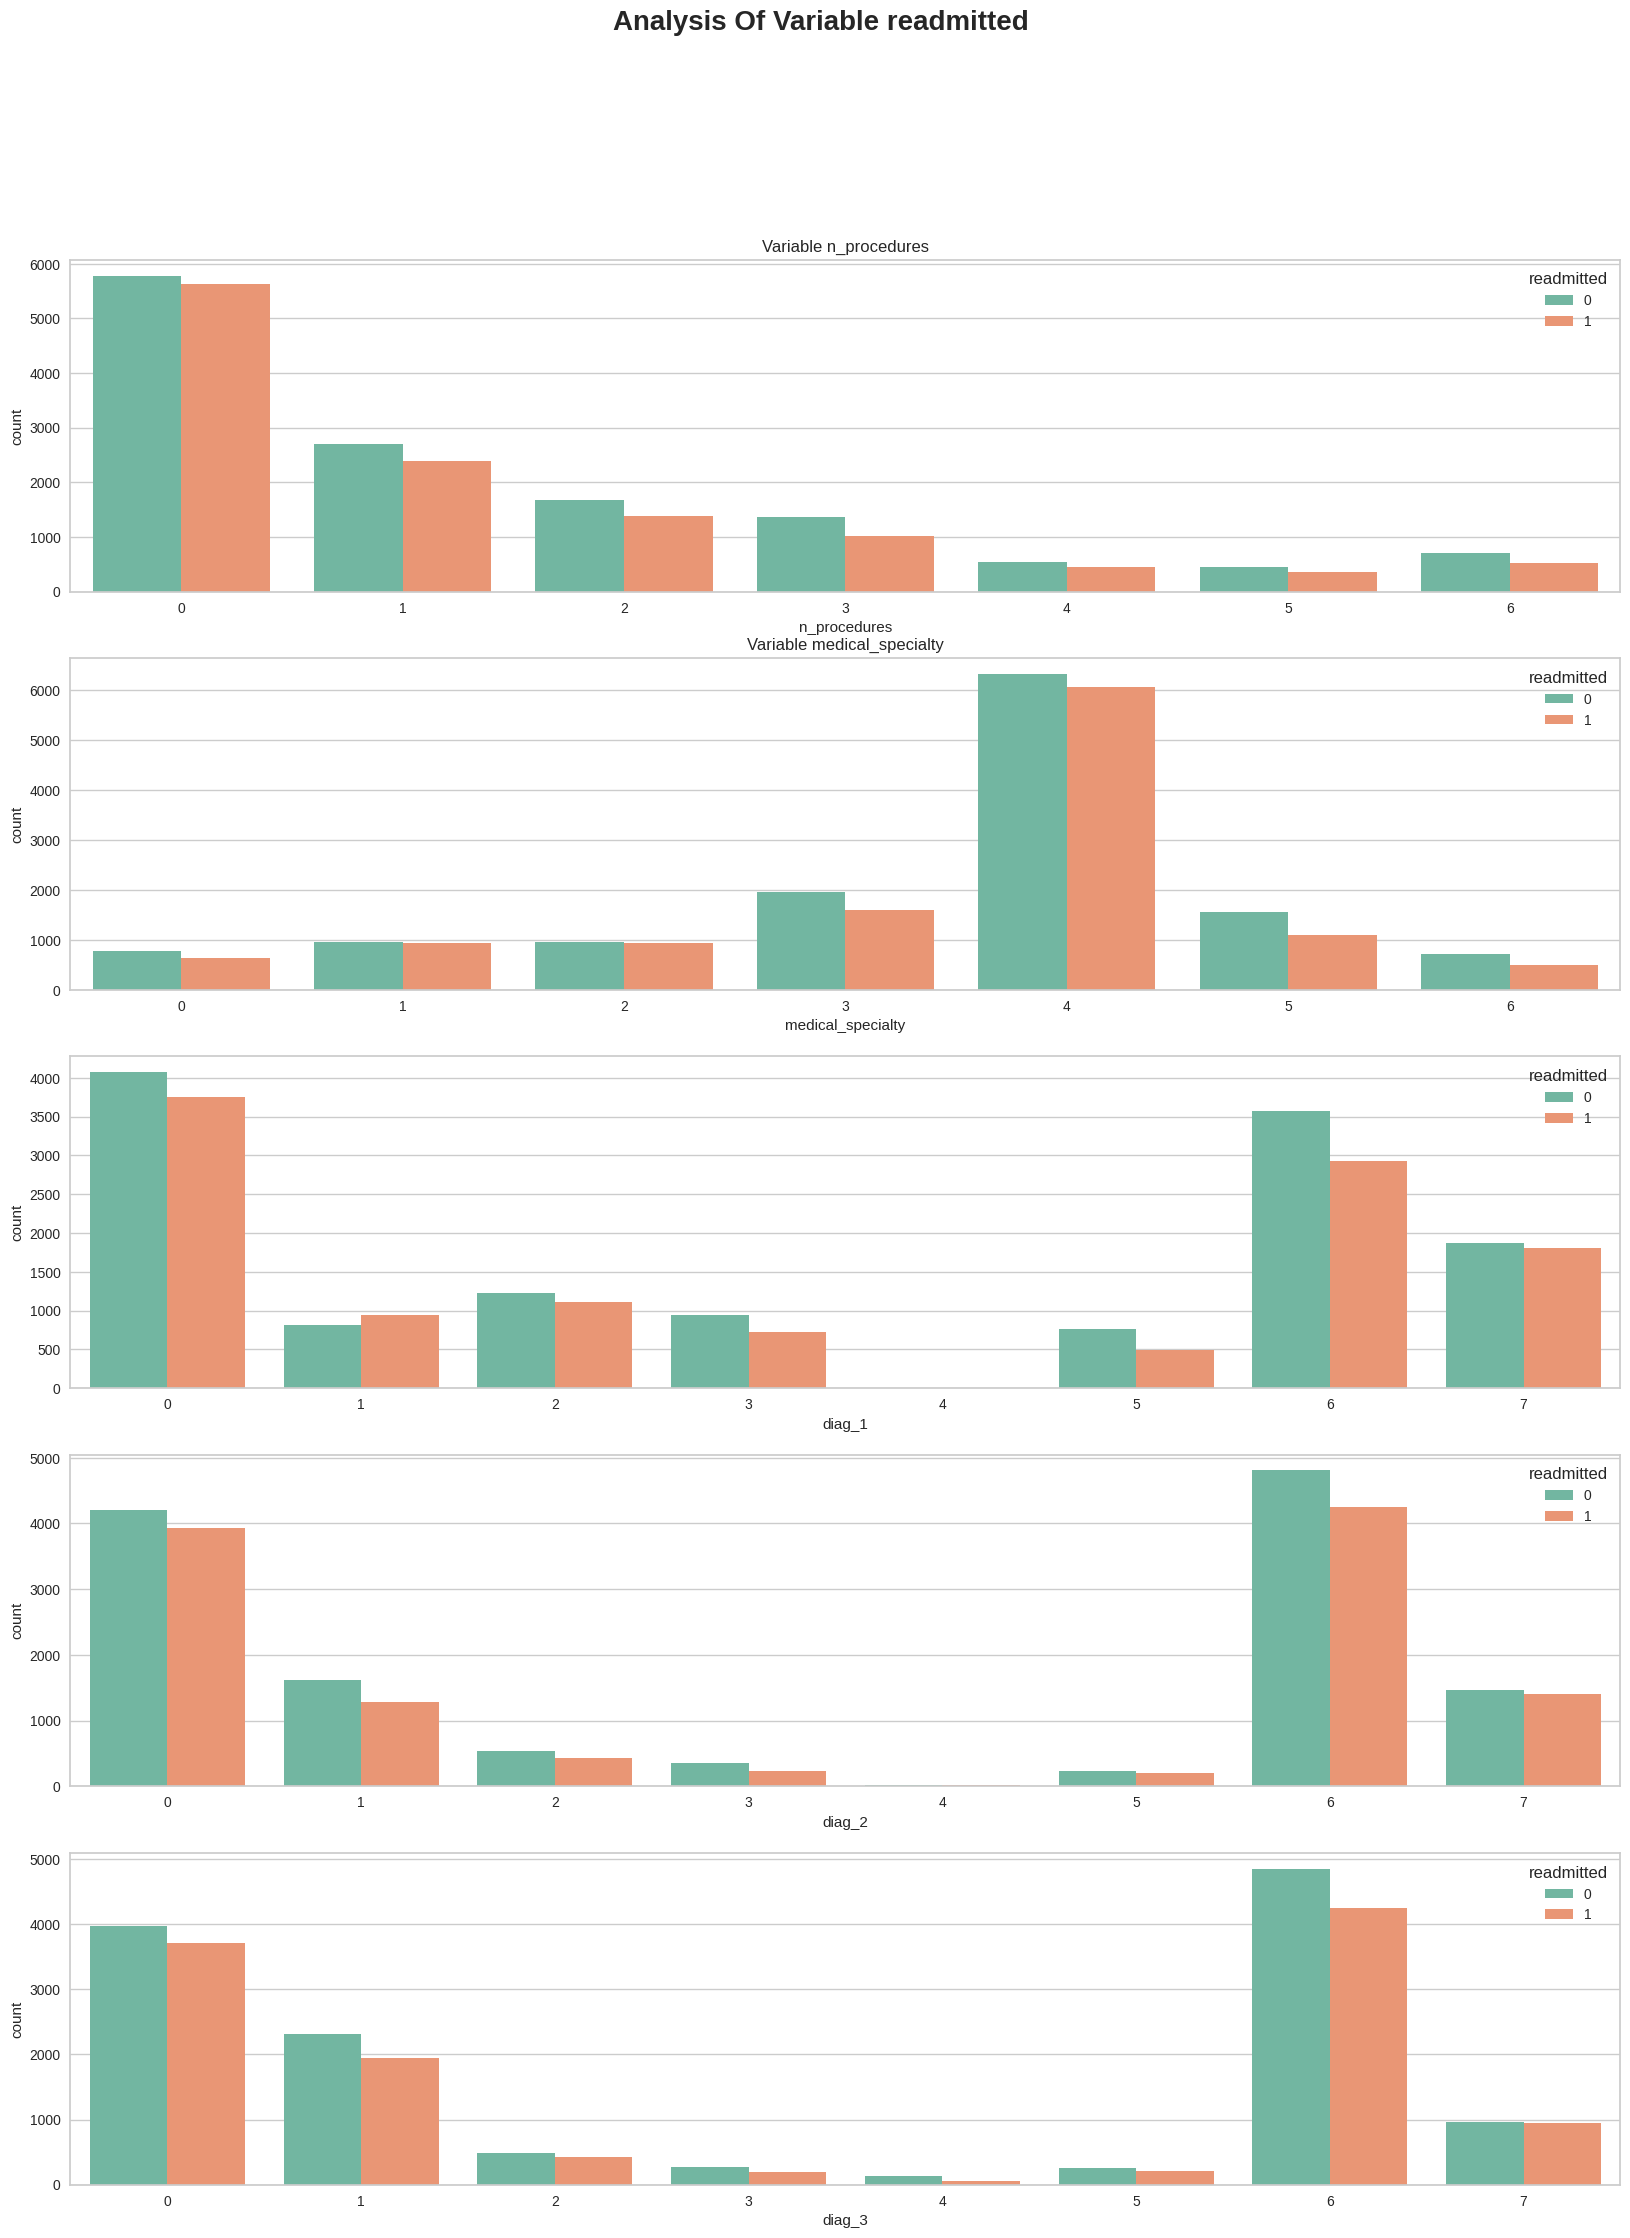

In [22]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable readmitted",fontweight="bold", fontsize=20)

plt.subplot(5, 1, 1)
plt.gca().set_title('Variable n_procedures')
sns.countplot(x = 'n_procedures', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(5, 1, 2)
plt.gca().set_title('Variable medical_specialty')
sns.countplot(x = 'medical_specialty', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(5, 1, 3)
sns.countplot(x = 'diag_1', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(5, 1, 4)
sns.countplot(x = 'diag_2', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(5, 1, 5)
sns.countplot(x = 'diag_3', hue = 'readmitted', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable diabetes_med'}, xlabel='diabetes_med', ylabel='count'>

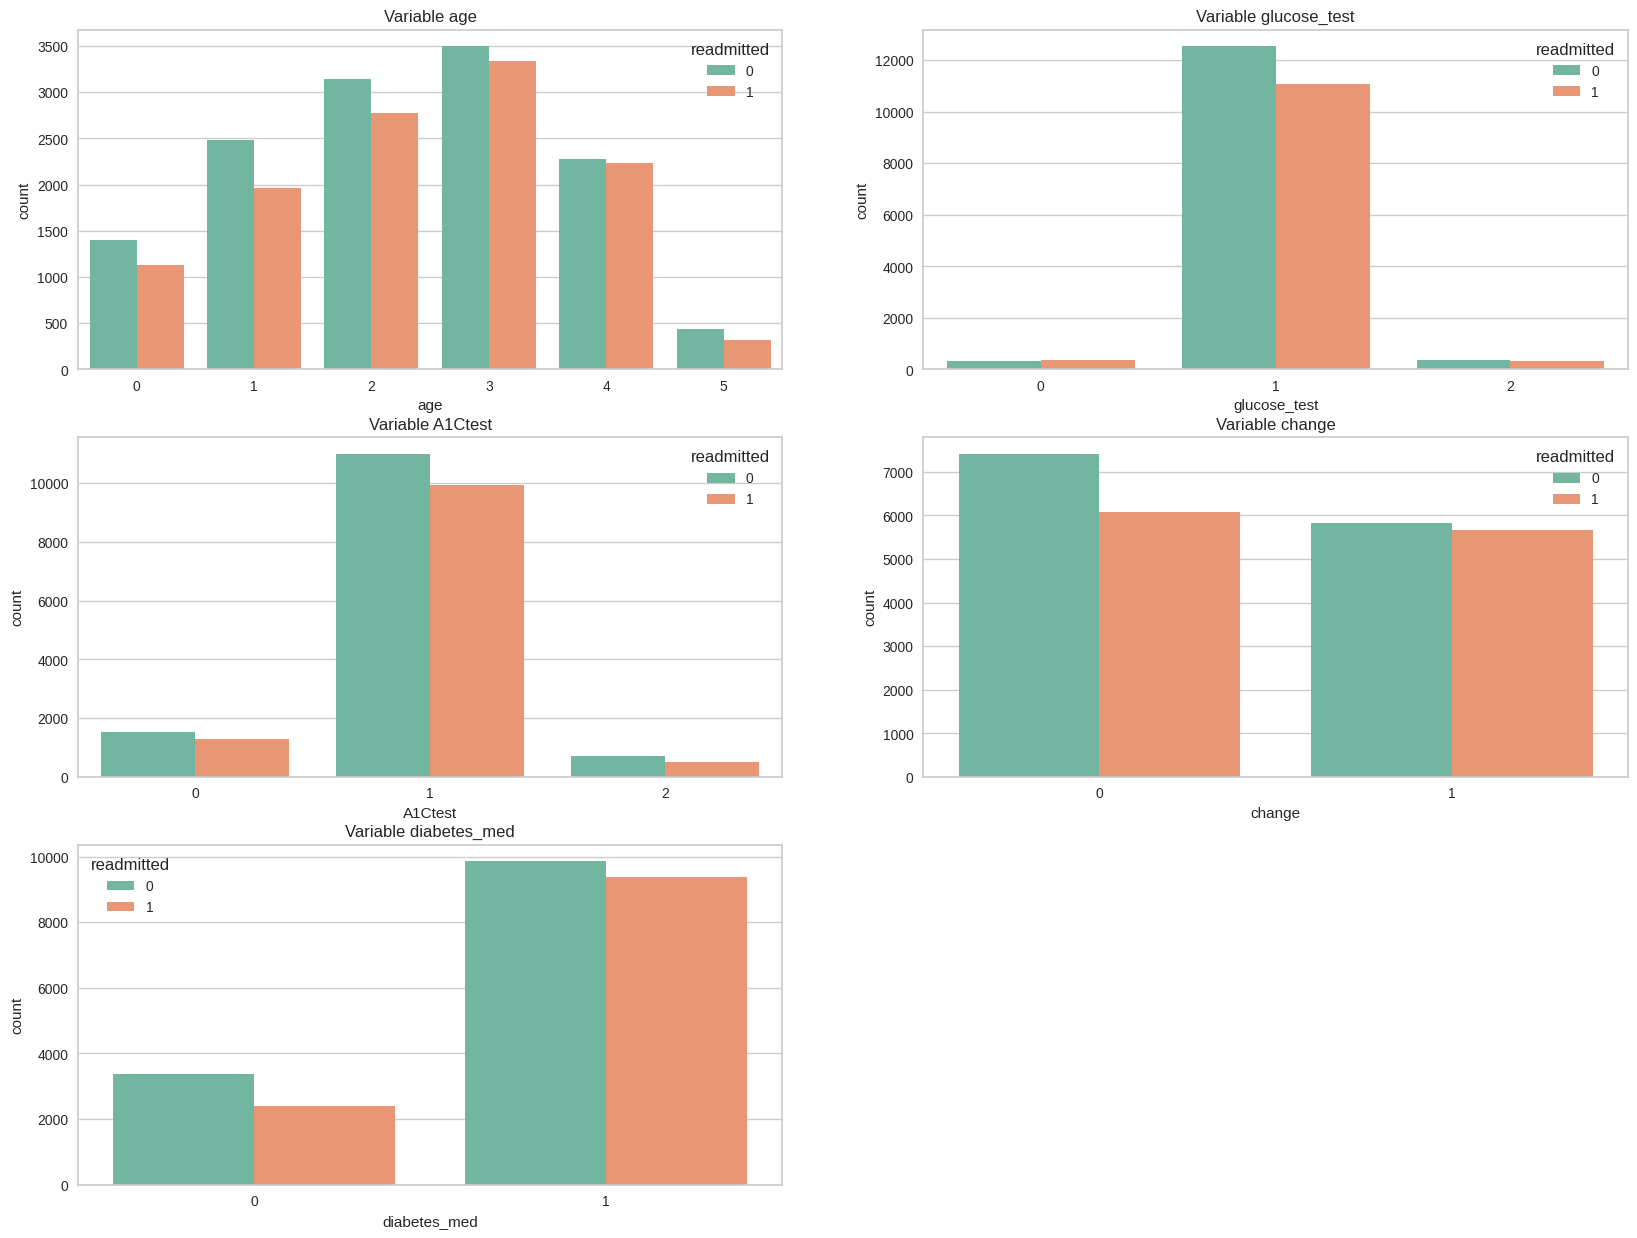

In [23]:
plt.figure(figsize = (20, 15))

plt.subplot(3, 2, 1)
plt.gca().set_title('Variable age')
sns.countplot(x = 'age', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(3, 2, 2)
plt.gca().set_title('Variable glucose_test')
sns.countplot(x = 'glucose_test', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(3, 2, 3)
plt.gca().set_title('Variable A1Ctest')
sns.countplot(x = 'A1Ctest', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(3, 2, 4)
plt.gca().set_title('Variable change')
sns.countplot(x = 'change', hue = 'readmitted', palette = 'Set2', data = df)

plt.subplot(3, 2, 5)
plt.gca().set_title('Variable diabetes_med')
sns.countplot(x = 'diabetes_med', hue = 'readmitted',  palette = 'Set2', data = df)

<Axes: xlabel='readmitted', ylabel='n_emergency'>

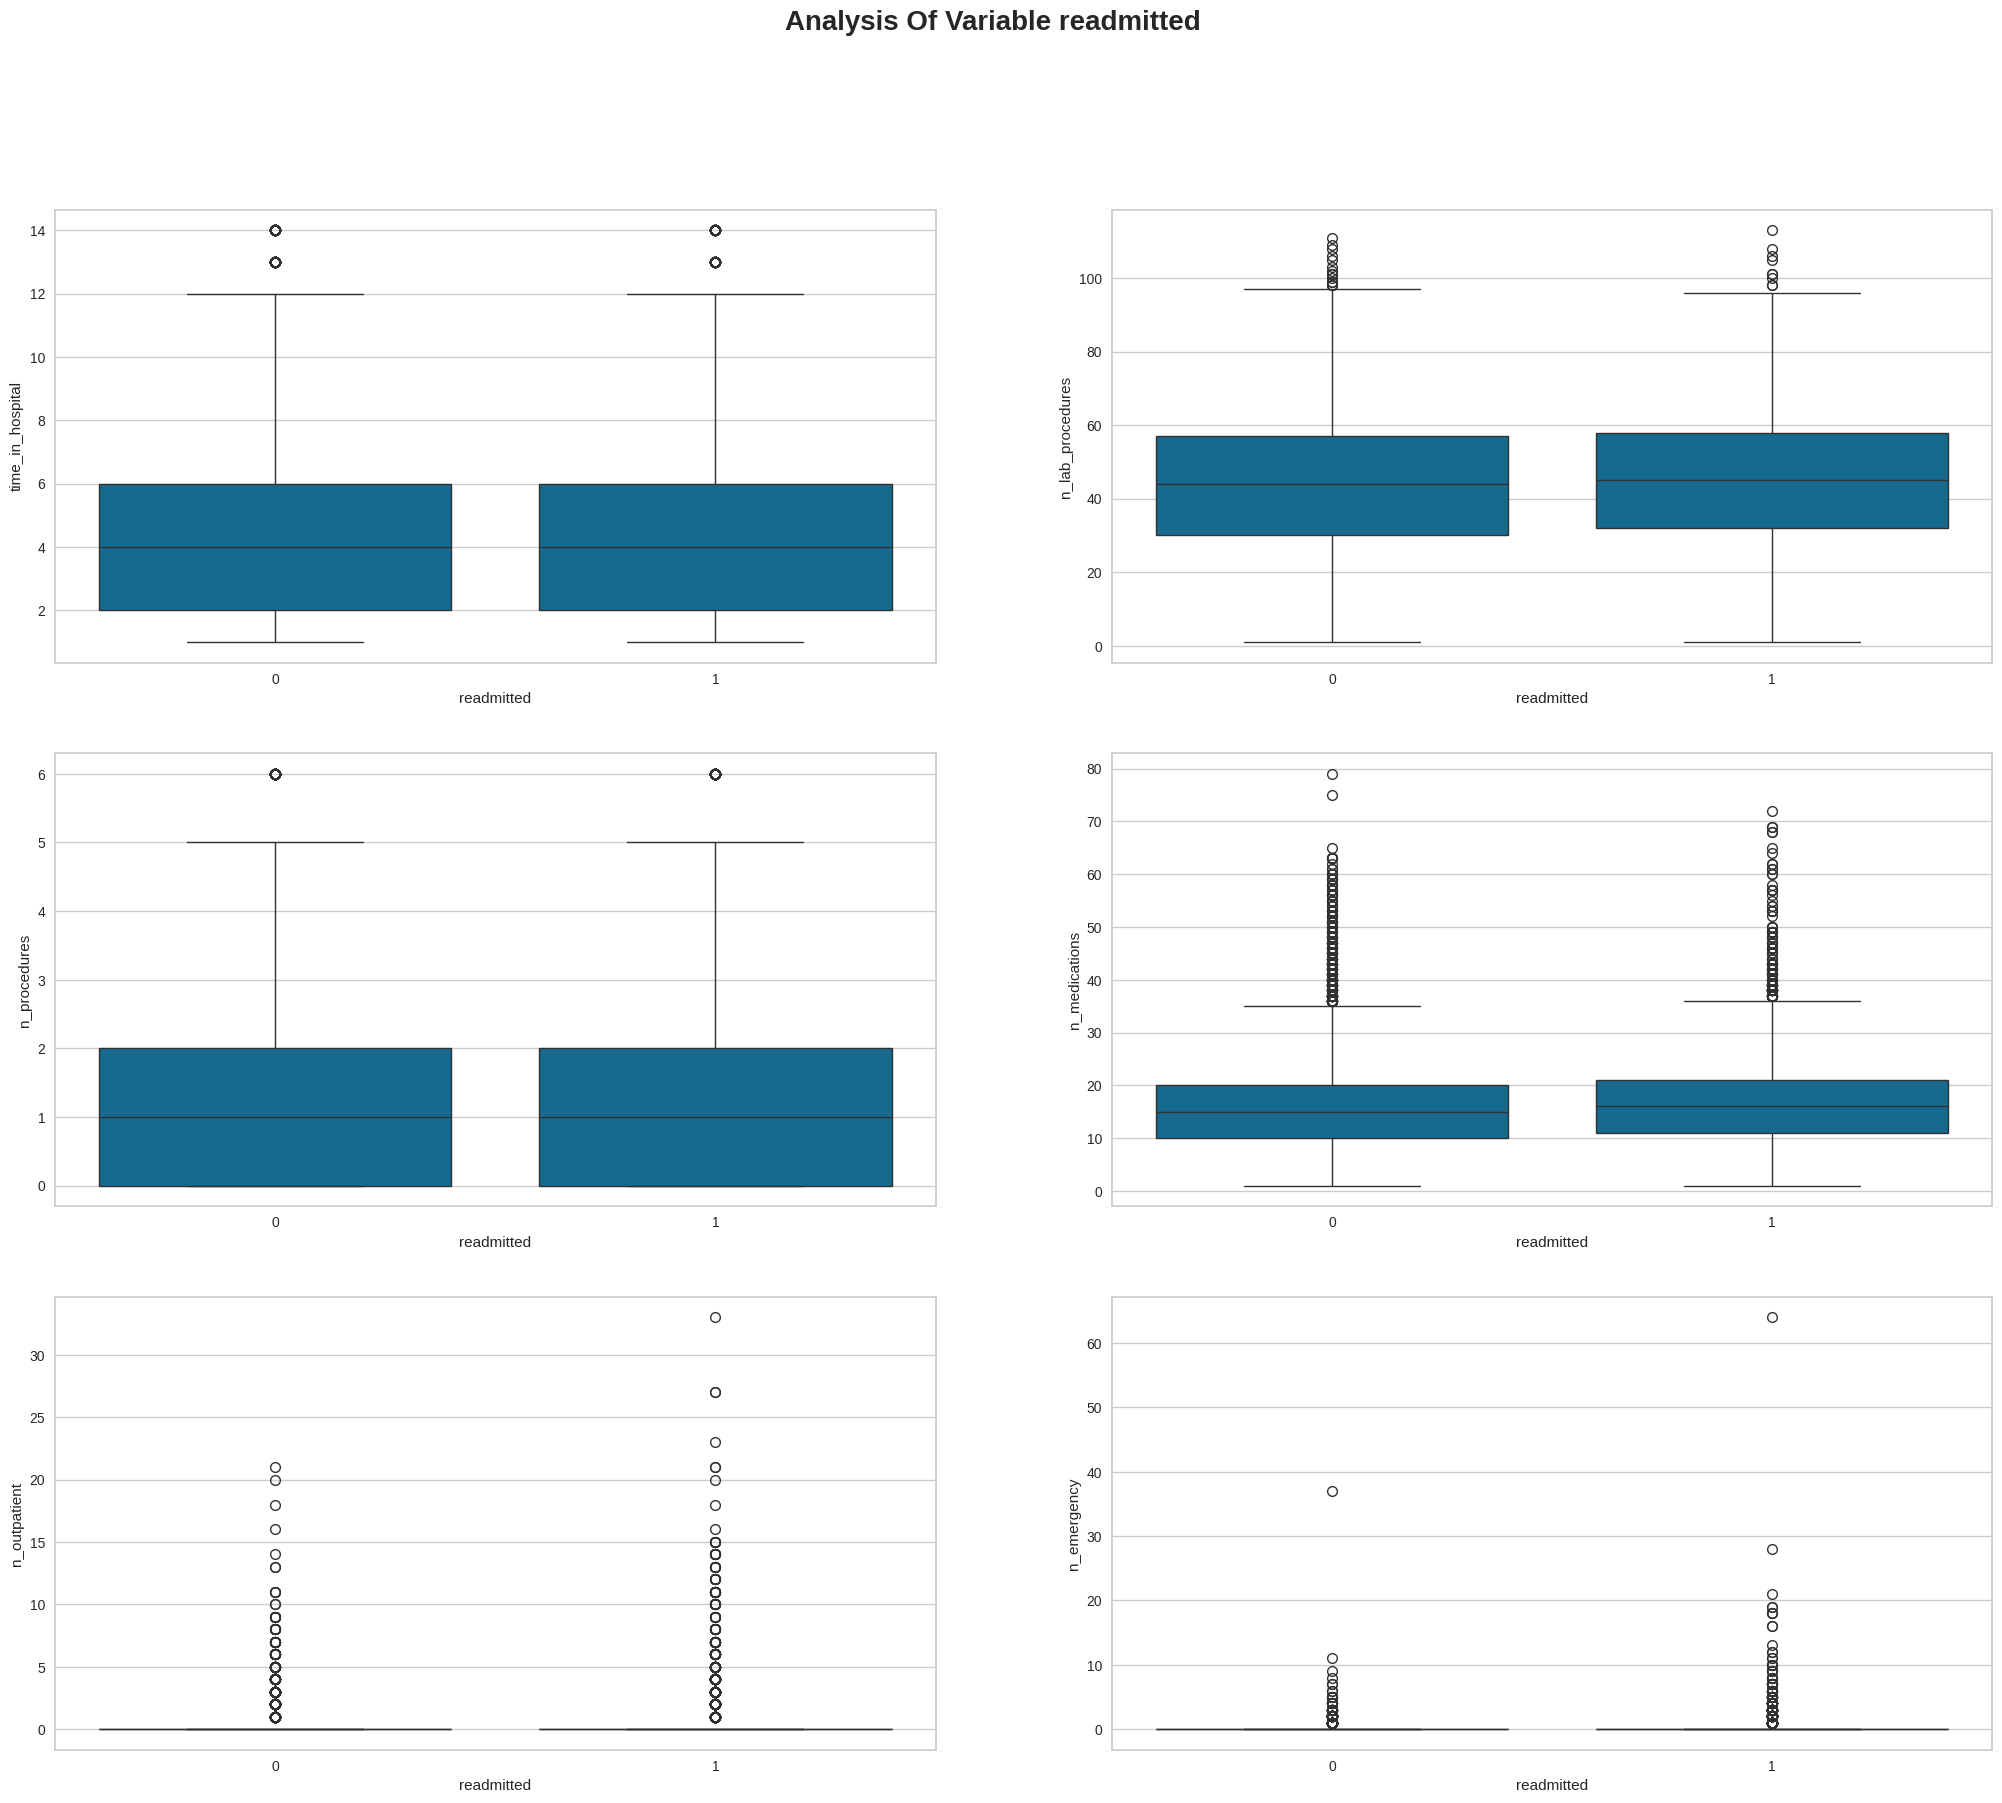

In [24]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable readmitted",fontweight="bold", fontsize=20)

plt.subplot(3,2,1)
sns.boxplot(x="readmitted", y="time_in_hospital", data=df)

plt.subplot(3,2,2)
sns.boxplot(x="readmitted", y="n_lab_procedures", data=df)

plt.subplot(3,2,3)
sns.boxplot(x="readmitted", y="n_procedures", data=df)

plt.subplot(3,2,4)
sns.boxplot(x="readmitted", y="n_medications", data=df)

plt.subplot(3,2,5)
sns.boxplot(x="readmitted", y="n_outpatient", data=df)

plt.subplot(3,2,6)
sns.boxplot(x="readmitted", y="n_emergency", data=df)

**Model Building**

Below we are going to use LabelEncoder to transform our categorical features into numerical features.

Below, we seperate into two features which are independent features and targeted feature.

In [25]:
X = df.drop('readmitted', axis = 1)
X = X.values
y = df['readmitted']



Below, we use StandardScaler to put our data in the same scale.

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

Train and test the data using train_test_split by using 20% of our data to test the machine learning models.

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.2, random_state = 0)

**Naive Bayes**

We did two steps using the Naive Bayes method:

- Run Gaussian Model
- We use the Naive Bayes Model, we test Gaussian model by using our normal data.

We obtained 57.26% of accuracy. Surely it's not a good model, the model learned the negative result but did not learn the positive result.

0.5726

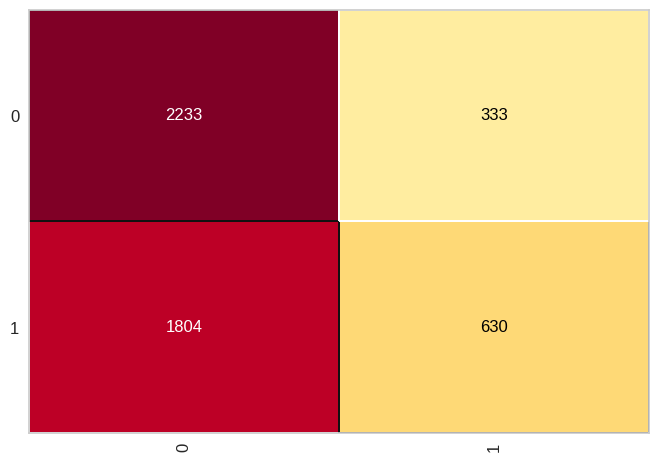

In [28]:
# Run Gaussian Model

from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)
previsoes = nb_clf.predict(X_test)

cm = ConfusionMatrix(nb_clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

Above, we run the data using Naive Gaussian method and obtained 57.26% accuracy score.  

In [29]:
classification_naive_gaussian = (classification_report(y_test, previsoes))
print(classification_naive_gaussian)

              precision    recall  f1-score   support

           0       0.55      0.87      0.68      2566
           1       0.65      0.26      0.37      2434

    accuracy                           0.57      5000
   macro avg       0.60      0.56      0.52      5000
weighted avg       0.60      0.57      0.53      5000



**Decision Tree**

- We run the data using DecisionTreeClassifier
- Later on, we tested the accuracy of the data using Cross Validation method

Below, we test the accuracy of the data using Cross Validation Score, and we obtained 54.10% of accuracy. Definitely it is not a good model as well.

In [30]:
from sklearn.model_selection import cross_val_score

tree_clf = DecisionTreeClassifier(random_state=0)

# Perform cross-validation
cv_scores = cross_val_score(tree_clf, X, y, cv=5, scoring='accuracy', verbose=2)

# Print the individual accuracy scores and the mean accuracy
print('The individual accuracy scores are: ', cv_scores)
print('')
print('The average accuracy score is: {:.2f}%'.format(np.mean(cv_scores) * 100))

[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
[CV] END .................................................... total time=   0.2s
The individual accuracy scores are:  [0.5428 0.5464 0.5242 0.551  0.5404]

The average accuracy score is: 54.10%


0.6

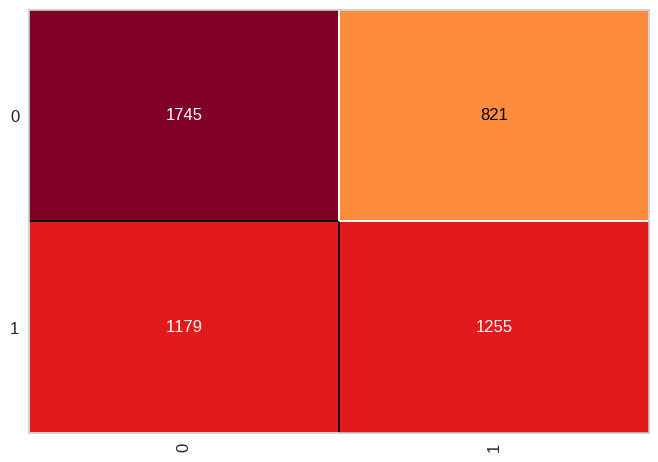

In [31]:
tree_clf = DecisionTreeClassifier( min_samples_split = 5, max_depth= 6, random_state=0)
tree_clf.fit(X_train, y_train)
previsoes = tree_clf.predict(X_test)

cm = ConfusionMatrix(tree_clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [32]:
columns = df.drop('readmitted', axis = 1).columns
feature_imp = pd.Series(tree_clf.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp

,0
n_inpatient,0.603878
n_outpatient,0.078756
n_medications,0.053123
age,0.052581
n_emergency,0.051025
time_in_hospital,0.037631
n_lab_procedures,0.035834
diabetes_med,0.030538
diag_1,0.013877
diag_3,0.010930


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(rf_clf, X, y, cv=5, scoring='accuracy', verbose=2)

# Print the individual accuracy scores and the mean accuracy
print('The individual accuracy scores are: ', cv_scores)
print('')
print('The average accuracy score is: {:.2f}%'.format(np.mean(cv_scores) * 100))

[CV] END .................................................... total time=  39.2s
[CV] END .................................................... total time=  36.9s
[CV] END .................................................... total time=  36.8s
[CV] END .................................................... total time=  36.2s
[CV] END .................................................... total time=  37.0s
The individual accuracy scores are:  [0.6092 0.606  0.6012 0.6192 0.6006]

The average accuracy score is: 60.72%


0.6078

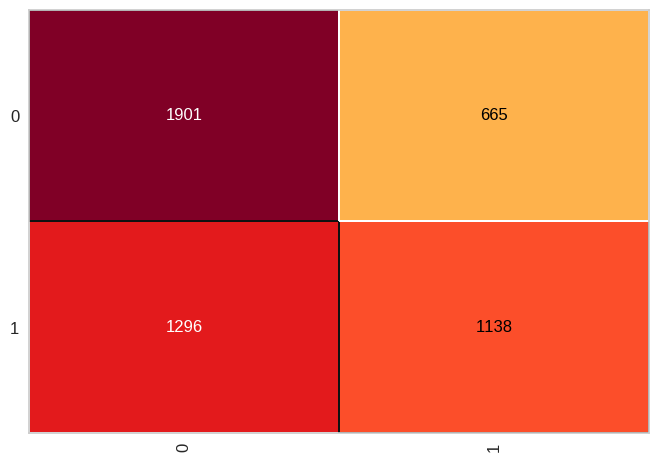

In [34]:
random_forest = RandomForestClassifier(min_samples_split = 5, max_depth= 11, random_state = 0)
random_forest.fit(X_train, y_train)
previsoes = random_forest.predict(X_test)

cm = ConfusionMatrix(random_forest)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [35]:
feature_imp_random = pd.Series(random_forest.feature_importances_, index = columns).sort_values(ascending = False)
feature_imp_random

,0
n_inpatient,0.198328
n_lab_procedures,0.120802
n_medications,0.115691
time_in_hospital,0.072211
n_outpatient,0.064305
age,0.059989
medical_specialty,0.054496
diag_1,0.050839
n_procedures,0.049698
n_emergency,0.049494


In [36]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(knn_clf, X, y, cv=5, scoring='accuracy', verbose=2)

# Print the individual accuracy scores and the mean accuracy
print('The individual accuracy scores are: ', cv_scores)
print('')
print('The average accuracy score is: {:.2f}%'.format(np.mean(cv_scores) * 100))

[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=   2.7s
[CV] END .................................................... total time=   2.1s
[CV] END .................................................... total time=   2.2s
[CV] END .................................................... total time=   2.2s
The individual accuracy scores are:  [0.5526 0.5474 0.5398 0.5432 0.552 ]

The average accuracy score is: 54.70%


0.5582

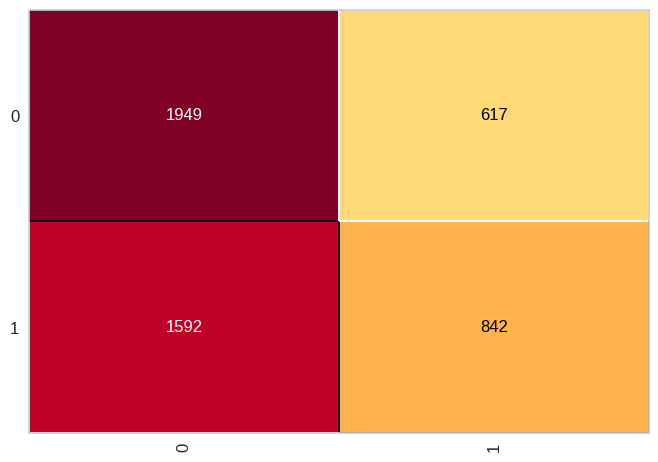

In [37]:

knn = KNeighborsClassifier(n_neighbors = 8, p = 2)
knn.fit(X_train, y_train)
previsoes = knn.predict(X_test)

cm = ConfusionMatrix(knn)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [38]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)


# Perform cross-validation
cv_scores = cross_val_score(lr_clf, X, y, cv=5, scoring='accuracy', verbose=2)

# Print the individual accuracy scores and the mean accuracy
print('The individual accuracy scores are: ', cv_scores)
print('')
print('The average accuracy score is: {:.2f}%'.format(np.mean(cv_scores) * 100))

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
The individual accuracy scores are:  [0.61   0.6132 0.6018 0.6136 0.5996]

The average accuracy score is: 60.76%


0.595

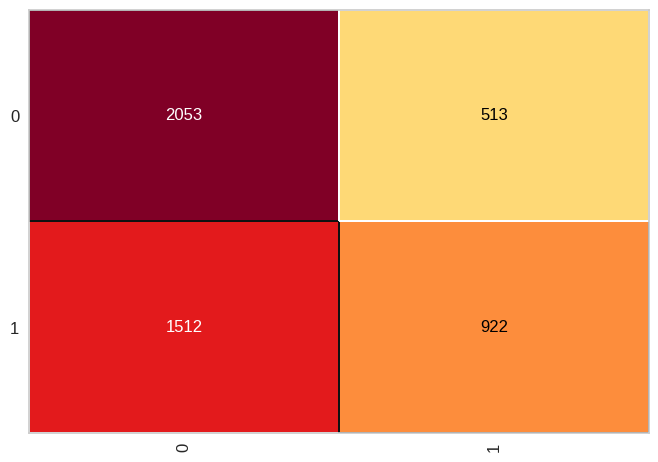

In [39]:

from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(random_state = 0)
logistic.fit(X_train, y_train)
previsoes = logistic.predict(X_test)

cm = ConfusionMatrix(logistic)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVM_patient = SVC(kernel='linear')

#training
SVM_patient.fit(X_train, y_train)

#prediction
y_hat = SVM_patient.predict(X_test)

mean_accuracy = cross_val_score(SVM_patient, X, y, cv=5, scoring='accuracy', verbose=2)

#evaluation
print ('The total number of accuracy are: ', mean_accuracy)
print ('')
print ('The avg of all is: ', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time= 3.1min
[CV] END .................................................... total time= 2.8min
[CV] END .................................................... total time= 2.9min
[CV] END .................................................... total time= 2.8min
[CV] END .................................................... total time= 2.9min
The total number of accuracy are:  [0.5978 0.6034 0.5966 0.6028 0.585 ]

The avg of all is:  59.711999999999996


In [41]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVM_patient = SVC(kernel='rbf')

#training
SVM_patient.fit(X_train, y_train)

#prediction
y_hat = SVM_patient.predict(X_test)

mean_accuracy = cross_val_score(SVM_patient, X, y, cv=5, scoring='accuracy', verbose=2)

#evaluation
print ('The total number of accuracy are: ', mean_accuracy)
print ('')
print ('The avg of all is: ', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=  24.6s
[CV] END .................................................... total time=  24.3s
[CV] END .................................................... total time=  24.4s
[CV] END .................................................... total time=  24.4s
[CV] END .................................................... total time=  23.0s
The total number of accuracy are:  [0.5924 0.5996 0.5948 0.5964 0.5826]

The avg of all is:  59.31600000000002


In [42]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVM_patient = SVC(kernel='poly')

#training
SVM_patient.fit(X_train, y_train)

#prediction
y_hat = SVM_patient.predict(X_test)

mean_accuracy = cross_val_score(SVM_patient, X, y, cv=5, scoring='accuracy', verbose=2)

#evaluation
print ('The total number of accuracy are: ', mean_accuracy)
print ('')
print ('The avg of all is: ', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=  31.6s
[CV] END .................................................... total time=  25.7s
[CV] END .................................................... total time=  24.3s
[CV] END .................................................... total time=  28.4s
[CV] END .................................................... total time=  25.0s
The total number of accuracy are:  [0.5792 0.5808 0.5764 0.5822 0.5726]

The avg of all is:  57.824


In [43]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SVM_patient = SVC(kernel='sigmoid')

#training
SVM_patient.fit(X_train, y_train)

#prediction
y_hat = SVM_patient.predict(X_test)

mean_accuracy = cross_val_score(SVM_patient, X, y, cv=5, scoring='accuracy', verbose=2)

#evaluation
print ('The total number of accuracy are: ', mean_accuracy)
print ('')
print ('The avg of all is: ', (np.mean(mean_accuracy))*100)

[CV] END .................................................... total time=  21.6s
[CV] END .................................................... total time=  20.5s
[CV] END .................................................... total time=  21.6s
[CV] END .................................................... total time=  20.9s
[CV] END .................................................... total time=  20.9s
The total number of accuracy are:  [0.4942 0.5008 0.4904 0.489  0.515 ]

The avg of all is:  49.788000000000004


0.5814

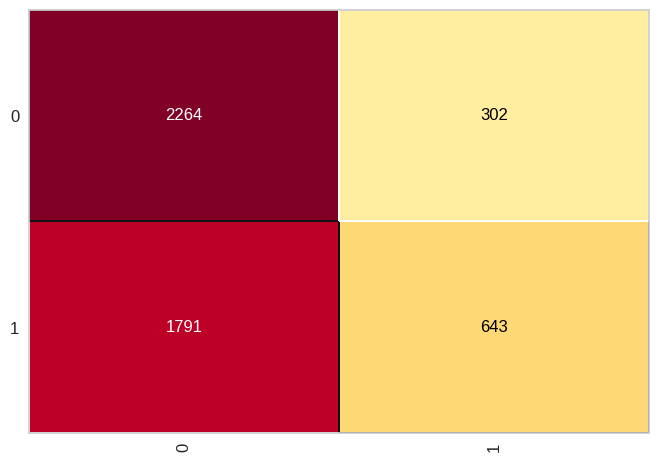

In [44]:

svm_clf = SVC(kernel = 'linear', gamma = 'auto', random_state = 1, C = 3.0)
svm_clf.fit(X_train, y_train)
previsoes = svm_clf.predict(X_test)

cm = ConfusionMatrix(svm_clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [45]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

# Perform cross-validation
cv_scores = cross_val_score(xgb_clf, X, y, cv=5, scoring='accuracy', verbose=2)

# Print the individual accuracy scores and the mean accuracy
print('The individual accuracy scores are: ', cv_scores)
print('')
print('The average accuracy score is: {:.2f}%'.format(np.mean(cv_scores) * 100))

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:39:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:39:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END .................................................... total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:39:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END .................................................... total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:39:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END .................................................... total time=   0.3s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:40:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END .................................................... total time=   0.2s


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:40:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END .................................................... total time=   0.2s
The individual accuracy scores are:  [0.6078 0.6042 0.5982 0.6054 0.5958]

The average accuracy score is: 60.23%


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:40:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.5926

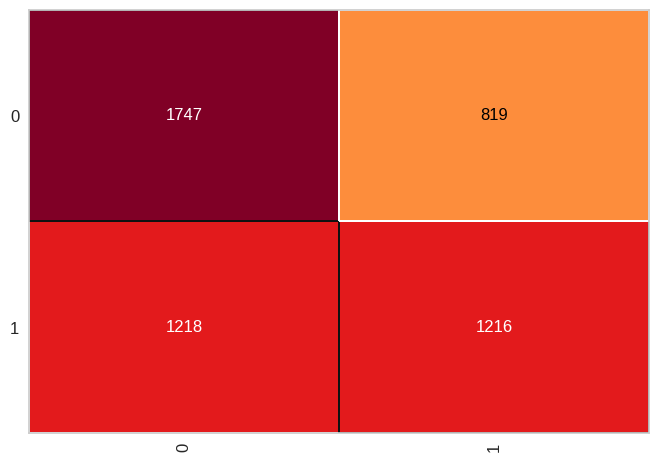

In [46]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_clf.fit(X_train, y_train)

cm = ConfusionMatrix(xgb_clf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)

In [47]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state = 0)
xgb.fit(X_train, y_train)
previsoes = xgb.predict(X_test)

# Perform cross-validation
cv_scores = cross_val_score(lr_clf, X, y, cv=5, scoring='accuracy', verbose=2)

# Print the individual accuracy scores and the mean accuracy
print('The individual accuracy scores are: ', cv_scores)
print('')
print('The average accuracy score is: {:.2f}%'.format(np.mean(cv_scores) * 100))


[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.1s
The individual accuracy scores are:  [0.61   0.6132 0.6018 0.6136 0.5996]

The average accuracy score is: 60.76%


In [48]:
! pip install streamlit -q
!wget -q -O - ipv4.icanhazip.com

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.6 MB/s eta 0:00:00
34.125.213.193


In [49]:


%%writefile app.py
import streamlit as st
st.write('# Streamlit_calculator')


def predict(age, time_in_hospital, n_lab_procedures, n_procedures, n_medications,
            n_outpatient, n_inpatient, n_emergency, A1Ctest, change,
            diabetes_med, glucose_, medical_specialty, diag_1, diag_2, diag_3):
    inputs = np.array([[age, time_in_hospital, n_lab_procedures, n_procedures, n_medications,
                        n_outpatient, n_inpatient, n_emergency, A1Ctest, change,
                        diabetes_med, glucose_, medical_specialty, diag_1, diag_2, diag_3]])
    inputs_scaled = scaler.transform(inputs)
    prediction = model.predict_proba(inputs_scaled)[0][1]  # Assuming binary classification, index 1 is for positive class
    return prediction

if st.button("Predict Readmission"):
    result = predict(age, time_in_hospital, n_lab_procedures, n_procedures, n_medications,
                     n_outpatient, n_inpatient, n_emergency, A1Ctest, change,
                     diabetes_med, glucose_, medical_specialty, diag_1, diag_2, diag_3)
    st.write(f"Readmission Probability: {result:.2%}")



Writing app.py


In [50]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.213.193:8501

Need to install the following packages:
  localtunnel@2.0.2
Ok to proceed? (y)   Stopping...
^C


In [51]:
nb_pred = nb_clf.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
tree_pred = tree_clf.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
rf_pred = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
knn_pred = knn_clf.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
lr_pred = lr_clf.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_pred)
svm_pred = svm_clf.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
xgb_pred = xgb_clf.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_pred)

Naive_dict_v1 = {'Model':'Naive Bayes',
               'Scaling':'Normal Data',
               'Precision':nb_accuracy}

Decision_dict = {'Model':'Decision Tree',
               'Scaling':'Normal Data',
               'Precision':tree_accuracy}

Random_dict = {'Model':'Random Forest',
               'Scaling':'Normal Data',
               'Precision':rf_accuracy}


KNN_dict_v2 = {'Model':'KNN',
               'Scaling':'Normal',
               'Precision':knn_accuracy}

Logistic_dict_v1 = {'Model':'Logistic Regression',
               'Scaling':'Normal Data',
               'Precision':lr_accuracy}

svm = {'Model':'SVM',
               'Scaling':'Standard Data',
               'Precision':svm_accuracy}

xgb_dict_v1 = {'Model':'XGB',
               'Scaling':'StandardScaler',
               'Precision':xgb_accuracy}

resume = pd.DataFrame({'Naive Bayes':pd.Series(Naive_dict_v1),
                       'Decision Tree':pd.Series(Decision_dict),
                       'Random Forest':pd.Series(Random_dict),
                       'KNN':pd.Series(KNN_dict_v2),
                       'Logistic Regression':pd.Series(Logistic_dict_v1),
                        'SVM':pd.Series(svm),
                       'XGB':pd.Series(xgb_dict_v1),
                       })
resume


,Naive Bayes,Decision Tree,Random Forest,KNN,Logistic Regression,SVM,XGB
Model,Naive Bayes,Decision Tree,Random Forest,KNN,Logistic Regression,SVM,XGB
Scaling,Normal Data,Normal Data,Normal Data,Normal,Normal Data,Standard Data,StandardScaler
Precision,0.5726,0.6,0.5896,0.5534,0.595,0.5814,0.5926


In [52]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.1/18.1 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.0 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing in

In [53]:
import gradio as gr

def predict_readmission(age, time_in_hospital, n_lab_procedures, n_procedures, n_medications, n_outpatient, n_inpatient, n_emergency, medical_specialty, diag_1, diag_2, diag_3, A1Ctest, change, diabetes_med, glucose_):
    # categorical features to numerical values
    age = ['age'],
    time_in_hospital = ['time_in_hospital'],
    n_lab_procedures = ['n_lab_procedures'],
    n_procedures = ['n_procedures'],
    n_medications = ['n_medications'],
    n_outpatient = ['n_outpatient'],
    n_inpatient = ['n_inpatient'],
    n_emergency = ['n_emergency'],
    medical_specialty = ['medical_specialty'],
    diag_1 = ['diag_1'],
    diag_2 = ['diag_2'],
    diag_3 = ['diag_3'],
    A1Ctest = ['A1Ctest'],
    change = ['change'],
    diabetes_med = ['diabetes_med'],
    glucose_ = ['glucose_']


    # Handle potential missing or invalid values
    #location = location_mapping.get(location, 0)
    #property_type = property_type_mapping.get(property_type, 0)
    #furnished = furnished_mapping.get(furnished, 0)

    # Prepare input data for prediction
    input_data = pd.DataFrame({
        'age': [age],
        'time_in_hospital': [time_in_hospital],
        'n_lab_procedures': [n_lab_procedures],
        'n_procedures': [n_procedures],
        'n_medications': [n_medications],
        'n_outpatient': [n_outpatient],
        'n_inpatient': [n_inpatient],
        'n_emergency': [n_emergency],
        'medical_specialty': [medical_specialty],
        'diag_1': [diag_1],
        'diag_2': [diag_2],
        'diag_3': [diag_3],
        'A1Ctest': [A1Ctest],
        'change': [change],
        'diabetes_med': [diabetes_med],
        'glucose_': [glucose_]
    })

    # Make prediction
    predicted_score = rf_tree.predict(input_data)[0]
    return f"Predicted patient readmission: ${predicted_score:.2f}"

age_options = ['45', '55', '65', '75', '85', '95']
#property_type_options = ['Condominium', 'Service Residence', 'Apartment', 'Flat', 'Studio']
#furnished_options = ['Not Furnished', 'Partially Furnished', 'Fully Furnished']

iface = gr.Interface(
    fn=predict_readmission,
    inputs=[
        gr.Dropdown(choices=age_options, label="Select Age"),
        gr.Slider(minimum=0, maximum=500, label="Time in Hospital"),
        gr.Slider(minimum=0, maximum=50, step=1, value=1, label="Num of Lab Procedures"),
        gr.Slider(minimum=0, maximum=100, step=1, value=1, label="Num of Procedures"),
        gr.Slider(minimum=0, maximum=50, step=1, value=1, label="Num of Medications"),
        gr.Slider(minimum=0, maximum=500, step=1, value=1, label="Num of Outpatient"),
        gr.Slider(minimum=0, maximum=500, step=1, value=1, label="Num of Inpatient"),
        gr.Slider(minimum=0, maximum=500, step=1, value=1, label="Num of Emergency"),
        gr.Slider(minimum=0, maximum=7, step=1, value=1, label="Medical Specialty"),
        gr.Slider(minimum=0, maximum=1, step=1, value=1, label="Diabetes Medicine")
    ],
    outputs="text"
)

# Create the Gradio interface
output = gr.Textbox(label="Predicted Patient Readmission")
gr_interface = gr.Interface(
    fn=predict_readmission,  # Use the correct function name
    inputs=[
        gr.Dropdown(choices=age_options, label="Select Age"),
        gr.Slider(minimum=0, maximum=500, label="Time in Hospital"),
        gr.Slider(minimum=0, maximum=50, step=1, value=1, label="Num of Lab Procedures"),
        gr.Slider(minimum=0, maximum=100, step=1, value=1, label="Num of Procedures"),
        gr.Slider(minimum=0, maximum=50, step=1, value=1, label="Num of Medications"),
        gr.Slider(minimum=0, maximum=50, step=1, value=1, label="Num of Outpatient"),
        gr.Slider(minimum=0, maximum=50, step=1, value=1, label="Num of Inpatient"),
        gr.Slider(minimum=0, maximum=50, step=1, value=1, label="Num of Emergency"),
        gr.Slider(minimum=0, maximum=7, step=1, value=1, label="Medical Specialty"),
        gr.Slider(minimum=0, maximum=1, step=1, value=1, label="Diabetes Medicine")
    ],
    outputs=output,
    title="Patient Readmission Prediction",
    description="Predict whether the patient will readmit or not."
)

gr_interface.launch()  # Launch the corrected interface


/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1002: UserWarning: Expected 16 arguments for function <function predict_readmission at 0x7d32b015d750>, received 10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/utils.py:1006: UserWarning: Expected at least 16 arguments for function <function predict_readmission at 0x7d32b015d750>, received 10.
  warnings.warn(


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://29892908fb95a80ff7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
